# Recognising NRs


In [1]:
import sys
import os
basef = "/mnt/data/Anastasia/"
wdirs = ["/mnt/data/Anastasia/18_11_29_pd23_11_div6_25Hzsqwave/",
         basef+"18_12_10_pd3_12_div7_WIS_NR-BeRST",
         basef+"18_12_12_pd7_12_div5_WIS_NR-BeRST",
         basef+"18_12_12_pd7_12_div5_WIS_NR-BeRST_DM590",
         basef+"19_01_30_pd25_01_div5_NR_BeRST",
         basef+"19_02_05_pd1_02_div4_NR_BeRST"
]

dfiles = []
for dirt in wdirs:
    basedir = dirt
    files = os.listdir(basedir)
    if dirt[-1] != '/':
        dirt = dirt+'/'
    for f in files:
        if f[-4:]=='.tif': 
            try:
                i = int(f[-5])
                dfiles.append(dirt+f)
            except:
                pass

            
     
               
  
            
#dfiles = dfiles[4:8]

print(len(dfiles))
print(dfiles)


35
['/mnt/data/Anastasia/18_11_29_pd23_11_div6_25Hzsqwave/cell2_3.tif', '/mnt/data/Anastasia/18_11_29_pd23_11_div6_25Hzsqwave/cell1_1.tif', '/mnt/data/Anastasia/18_11_29_pd23_11_div6_25Hzsqwave/cell3_5.tif', '/mnt/data/Anastasia/18_11_29_pd23_11_div6_25Hzsqwave/cell4_7.tif', '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell5_10.tif', '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell2_3.tif', '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell1_1.tif', '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell4_8.tif', '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell7_14.tif', '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell6_12.tif', '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell3_5.tif', '/mnt/data/Anastasia/18_12_12_pd7_12_div5_WIS_NR-BeRST/cell1_1.tif', '/mnt/data/Anastasia/18_12_12_pd7_12_div5_WIS_NR-BeRST/cell3_7.tif', '/mnt/data/Anastasia/18_12_12_pd7_12_div5_WIS_NR-BeRST/cell2_4.tif', '/mnt/data/Anastasia/18_12_12_p

In [2]:
sys.path.append("/export/home1/users/bssn/serna/GitIBENS/Nanorods")

In [3]:
from numpy import *
from matplotlib.pylab import *
import scipy.optimize as opt
import pickle
from scipy.optimize import minimize,least_squares
from scipy.stats import linregress

%matplotlib inline

In [4]:
from signal_analysis.core import dblgausfit,dblgaussd

In [5]:
for i,cfile in enumerate(dfiles):
    wdir = ''
    cf2 = cfile.split(".")[0].split("/")
    for fs in cf2[:-1]:
        wdir = wdir+fs+'/'
    mfile = wdir+cf2[-1]+'output/ROIs_Inmask.dat'
    mt = loadtxt(mfile)
    print(mt.shape)
    if i == 0:
        imsk = mt.flatten()
    else:
        imsk = concatenate((imsk,mt.flatten()))

(1333,)
(1623,)
(860,)
(1495,)
(376,)
(4426,)
(5765,)
(224,)
(3874,)
(7559,)
(8985,)
(2482,)
(3059,)
(2717,)
(3032,)
(2960,)
(3065,)
(3251,)
(2619,)
(1362,)
(1443,)
(1955,)
(1754,)
(1145,)
(3047,)
(1831,)
(1820,)
(2882,)
(903,)
(1573,)
(416,)
(3973,)
(1288,)
(1200,)
(654,)


In [6]:
dataL = []
nwdirs = []
for i,cfile in enumerate(dfiles):
    wdir = ''
    cf2 = cfile.split(".")[0].split("/")
    for fs in cf2[:-1]:
        wdir = wdir+fs+'/'
    wdir = wdir+cf2[-1]+'output/sptrack/'
    nwdirs.append(wdir)
    
    with open(wdir+'data_msd.pickle', 'rb') as handle:
        datat = pickle.load(handle)
    
    dataL.append(datat)

In [7]:
nwdirs

['/mnt/data/Anastasia/18_11_29_pd23_11_div6_25Hzsqwave/cell2_3output/sptrack/',
 '/mnt/data/Anastasia/18_11_29_pd23_11_div6_25Hzsqwave/cell1_1output/sptrack/',
 '/mnt/data/Anastasia/18_11_29_pd23_11_div6_25Hzsqwave/cell3_5output/sptrack/',
 '/mnt/data/Anastasia/18_11_29_pd23_11_div6_25Hzsqwave/cell4_7output/sptrack/',
 '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell5_10output/sptrack/',
 '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell2_3output/sptrack/',
 '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell1_1output/sptrack/',
 '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell4_8output/sptrack/',
 '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell7_14output/sptrack/',
 '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell6_12output/sptrack/',
 '/mnt/data/Anastasia/18_12_10_pd3_12_div7_WIS_NR-BeRST/cell3_5output/sptrack/',
 '/mnt/data/Anastasia/18_12_12_pd7_12_div5_WIS_NR-BeRST/cell1_1output/sptrack/',
 '/mnt/data/Anastasia/18_12_1

In [8]:
def bimod(x):
    m1 = mean(x)
    m2 = std(x)
    m3 = mean((x-m1)**3)/m2**3
    m4 = mean((x-m1)**4)/m2**4
    return((m3**2+1)/m4)

In [9]:
dfilesF = []
driftcorrected = True
for i,dirt in enumerate(nwdirs):
    basedir = dirt
    files = os.listdir(basedir)
    dfiles = []
    if driftcorrected:
        #print(files[0])
        for f in files:
            
            if f[-4:]=='.npy'and f[:4]=='posh' and f[-6:-4]=='DC': dfiles.append(basedir+f)
    else:
        for f in files:
            if f[-4:]=='.npy'and f[:4]=='posh' and f[-6:-4]!='DC': dfiles.append(basedir+f)
    dfiles.sort()
    dfilesF.extend(dfiles)

In [10]:
len(dfilesF)

86951

In [11]:
for i,dirt in enumerate(nwdirs):
    basedir = dirt
    files = os.listdir(basedir)
    dfiles = []
    if driftcorrected:
        for f in files:
            if f[-4:]=='.npy'and f[:4]=='posh' and f[-6:-4]=='DC': dfiles.append(basedir+f)
    else:
        for f in files:
            if f[-4:]=='.npy'and f[:4]=='posh' and f[-6:-4]!='DC': dfiles.append(basedir+f)
    dfiles.sort()

    dgpt = []
    idxt = []
    amps = []
    for ni,name in enumerate(dfiles):
        popts = load(name)
        posx = popts[:,5]
        posy = popts[:,6]
        amp = popts[:,0]
        th = 0
        th2 = 13.0
        sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
        Tf = len(posx)
        if sel.sum() > 1000:
            amps.append([mean(amp[sel]),mean(popts[sel,4]),bimod(amp[sel])])
            idxt.append(ni)

            m1,m2 = (mean(amp[sel]),std(amp[sel]))
            am = (amp[sel]-m1)/m2
            h = histogram(am,arange(min(am),max(am),0.2))
            hd = h[0]/sum(h[0])/0.2
            hx = (h[1][1:]+h[1][:-1])/2.0
            dgfit = dblgausfit(hx,hd,par0=array([0.5,-1,.5,1,.5]))
            dgpt.append(concatenate(([m1,m2],dgfit.x)))
            #if ni<15:
            #    plot(hx,hd,'.')
            #    plot(linspace(-4,4,100),dblgaussd(linspace(-4,4,100),dgfit.x))
            #else:
            #    break
            
    #print(i,idx0.shape,len(dfiles))
    if i == 0:
        dgps = column_stack((array(dgpt),zeros(len(dgpt))+i))
        ampst = column_stack((array(amps),zeros(len(dgpt))+i))
        idx0 = array(idxt)
    else:
        dgps = row_stack((dgps,column_stack((array(dgpt),zeros(len(dgpt))+i))))
        ampst = row_stack((ampst,column_stack((array(amps),zeros(len(dgpt))+i))))
        idx0 = concatenate((idx0,array(idxt)+idx0[-1]+1))
        

In [12]:
dgps.shape

(86801, 8)

In [13]:
import seaborn as sns
sns.set(style="white", color_codes=True)

(86801,)


Text(0,0.5,'p_1')

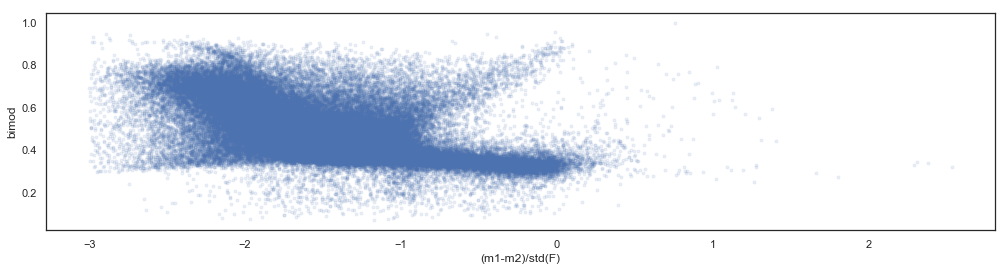

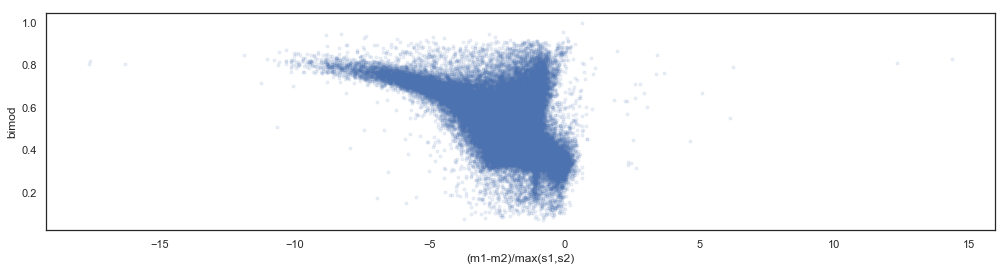

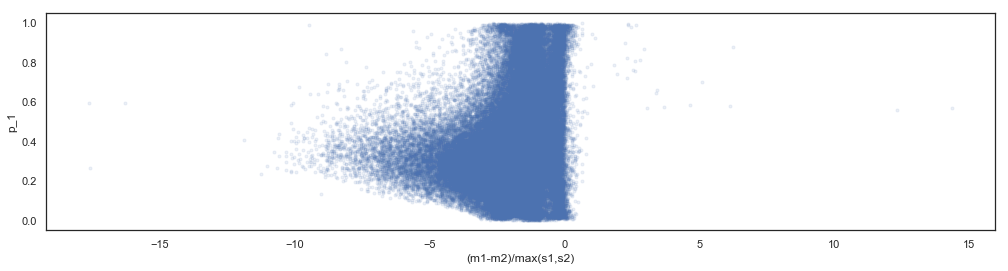

In [15]:
sel = (abs(dgps[:,3]-dgps[:,5])<3)*(dgps[:,2]>0)*(dgps[:,2]<1)
figure(figsize=(17,4))
plot(dgps[sel,3]-dgps[sel,5],ampst[sel,2],'.',alpha=0.1)
xlabel("(m1-m2)/std(F)")
ylabel("bimod")
figure(figsize=(17,4))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
#s1 = column_stack((dgps[sel,6],dgps[sel,4])).sum(axis=1)

xt = (dgps[:,3]-dgps[:,5])/s1
sel = (abs(dgps[:,3]-dgps[:,5])<3)*(dgps[:,2]>0)*(dgps[:,2]<1)*(abs(xt)<20)
print(s1.shape)
plot(xt[sel],ampst[sel,2],'.',alpha=0.1)
xlabel("(m1-m2)/max(s1,s2)")
ylabel("bimod")
figure(figsize=(17,4))
plot(xt[sel],dgps[sel,2],'.',alpha=0.1)
xlabel("(m1-m2)/max(s1,s2)")
ylabel("p_1")

In [16]:
def conditionnumber(a,D,dG = None):
    if dG is not None:
        if dG >4:
            return(7)
    if a<0.1:
        return(0)
    if a>0.1 and a<0.4:
        return(1)
    if a>0.4 and a<1.0 and D<1e-2:
        return(2)
    if a>1.0 and a<3.0 and D>1e-2:
        return(3)
    if a>1.0 and a<3.0 and D<1e-2:
        return(4)
    if a>3.0:
        return(5)
    return(6)


def conditionlabel(i):
    if i==0:
        return("Amp/Bg<0.1")
    if i==1:
        return("0.1< Amp/Bg <0.4")
    if i==2:
        return("0.4< Amp/Bg <1.0 & D0<0.01 um2/s")
    if i==3:
        return("1< Amp/Bg <3 & D0>0.01 um2/s")
    if i==4:
        return("1< Amp/Bg <3 & D0<0.01 um2/s")
    if i==5:
        return("Amp/Bg>3")
    if i==6:
        return("Others")
    if i==7:
        return("Sharp Nanorod")


#sel = (ampst[:,0]/ampst[:,1]>0.1)*(ampst[:,0]/ampst[:,1]<0.4)
#sel = (ampst[:,0]/ampst[:,1]>0.4)*(ampst[:,0]/ampst[:,1]<1.0)*(Des[:,0]<1e-2)
#sel = (ampst[:,0]/ampst[:,1]>1.0)*(ampst[:,0]/ampst[:,1]<3.0)*(Des[:,0]>1e-2)
#sel = (ampst[:,0]/ampst[:,1]>1.0)*(ampst[:,0]/ampst[:,1]<3.0)*(Des[:,0]<1e-2)
#sel0 = (ampst[:,0]/ampst[:,1]>3.0)
#conditionnumber(0.5,0.6)

In [17]:
print(len(dataL),len(dataL[0])+len(dataL[1])+len(dataL[2])+len(dataL[3]))

35 5294


In [31]:
from msd import extractmsd,extractDe

In [32]:
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
dG = (dgps[:,3]-dgps[:,5])/s1
dG[dG>20] = 0

iNR = 0
cmapt = get_cmap('tab20')



xds,xde,xden = extractmsd(dataL,verbose=True)


/export/home1/users/bssn/serna/GitIBENS/Nanorods/sptrack/Classifying NRs/msd.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  seb = sqrt((ssx*ssy-ssxy**2)/((n-2)))/ssx
/export/home1/users/bssn/serna/GitIBENS/Nanorods/sptrack/Classifying NRs/msd.py:21: RuntimeWarning: invalid value encountered in double_scalars
  b = ssxy/ssx
/export/home1/users/bssn/serna/GitIBENS/Nanorods/sptrack/Classifying NRs/msd.py:22: RuntimeWarning: invalid value encountered in double_scalars
  seb = sqrt((ssx*ssy-ssxy**2)/((n-2)))/ssx
/export/home1/users/bssn/serna/GitIBENS/Nanorods/sptrack/Classifying NRs/msd.py:22: RuntimeWarning: invalid value encountered in sqrt
  seb = sqrt((ssx*ssy-ssxy**2)/((n-2)))/ssx


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


In [40]:
dataL = 0

In [ ]:
dataL = []
nwdirs = []
for i,cfile in enumerate(dfiles[19:]):
    wdir = ''
    cf2 = cfile.split(".")[0].split("/")
    for fs in cf2[:-1]:
        wdir = wdir+fs+'/'
    wdir = wdir+cf2[-1]+'output/sptrack/'
    nwdirs.append(wdir)
    
    with open(wdir+'data_msd.pickle', 'rb') as handle:
        datat = pickle.load(handle)
    dataL = [datat]


    xdst,xdet,xdent = extractmsd(dataL,verbose=True)


    Dest, Dept = extractDe(dataL,xdet,xdst)
    print(i)
    xdst[:,-1] = i
    xdet[:,-1] = i
    xdent[:,-1] = i
    Dest[:,-1] = i
    Dept[:,-1] = i
    if i == 0:
        xds = xdst
        xde = xdet
        xden = xdent
        Des = Dest
        Dep = Dept
    else:
        xds = row_stack((xds,xdst))
        xde = row_stack((xde,xdet))
        xden = row_stack((xden,xdent))
        Des = row_stack((Des,Dest))
        Dep = row_stack((Dep,Dept))

/users/bssn/serna/environments/deepl/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/users/bssn/serna/environments/deepl/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/users/bssn/serna/environments/deepl/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [49]:
with open('/mnt/data/Anastasia/RecognisingNRs_allcells.pkl','wb') as f:
    pickle.dump([imsk,nwdirs,dfilesF,dgps,ampst,idx0,xds,xde,xden,Des,Dep],f)

In [48]:
ts = array([100,200,400,800,1600,3200,6400,12800])/1000.0
xt = xde[(abs(xde[:,-2]-0)<1e-3)*(abs(xde[:,-1]-idat)<1e-3),0]
print(xt)
idxts = zeros(ts.shape[0],dtype=int)
idx = arange(xt.shape[0])
for i in range(len(ts)):
    idxts[i] = idx[argmin(abs(xt-ts[i]))]

[1.0000e-02 2.0000e-02 3.0000e-02 4.0000e-02 5.0000e-02 6.0000e-02
 7.0000e-02 8.0000e-02 9.0000e-02 1.0000e-01 1.1000e-01 1.2000e-01
 1.3000e-01 1.4000e-01 1.5000e-01 1.6000e-01 1.7000e-01 1.8000e-01
 1.9000e-01 2.0000e-01 2.1000e-01 2.2000e-01 2.3000e-01 2.4000e-01
 2.5000e-01 2.6000e-01 2.7000e-01 2.8000e-01 2.9500e-01 3.1000e-01
 3.2000e-01 3.3000e-01 3.4500e-01 3.6000e-01 3.7500e-01 3.9000e-01
 4.0500e-01 4.2500e-01 4.4000e-01 4.5500e-01 4.7500e-01 4.9500e-01
 5.1500e-01 5.3500e-01 5.6000e-01 5.8500e-01 6.0500e-01 6.3000e-01
 6.5500e-01 6.8000e-01 7.1000e-01 7.4000e-01 7.7000e-01 8.0000e-01
 8.3500e-01 8.7000e-01 9.0500e-01 9.4000e-01 9.7500e-01 1.0150e+00
 1.0600e+00 1.1050e+00 1.1500e+00 1.1950e+00 1.2400e+00 1.2950e+00
 1.3500e+00 1.4050e+00 1.4650e+00 1.5250e+00 1.5850e+00 1.6500e+00
 1.7150e+00 1.7850e+00 1.8600e+00 1.9350e+00 2.0150e+00 2.0950e+00
 2.1800e+00 2.2700e+00 2.3600e+00 2.4550e+00 2.5550e+00 2.6600e+00
 2.7700e+00 2.8850e+00 3.0050e+00 3.1250e+00 3.2500e+00 3.3850

In [50]:
import seaborn as sns
sns.set(style="white", color_codes=True)

In [51]:
print(imsk.shape,ampst.shape,idx0[-1],imsk[idx0].shape)

(86951,) (86801, 4) 86950 (86801,)


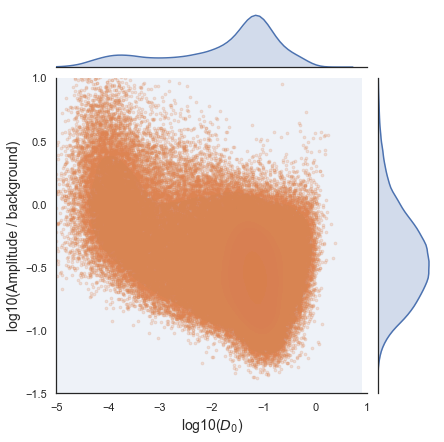

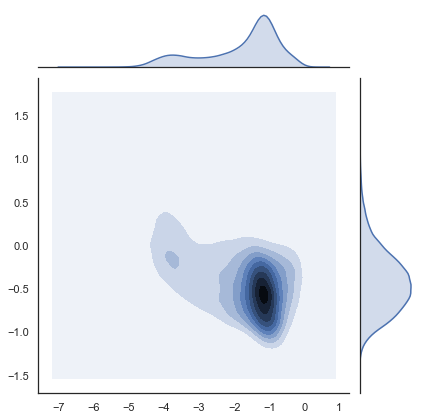

In [53]:
yt = ampst[:,0]/ampst[:,1]
xt = Des[:,0]
sel = (xt>0)*(yt>0)
xt = log10(xt[sel])
yt = log10(yt[sel])
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_ylim([-1.5,1.0])
g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("log10(Amplitude / background)",fontsize=14)
#g.x = df2.x2
#g.y = df2.y2
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_ylim([-1.5,1.0])
g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("log10(Amplitude / background)",fontsize=14)
#g.x = df2.x2
#g.y = df2.y2
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

g.x =  xt[imsk[idx0[sel]] ==1]
g.y = yt[imsk[idx0[sel]] ==1]
g.plot_joint(plt.scatter, marker='.', c='C3', s=60,alpha=0.7)


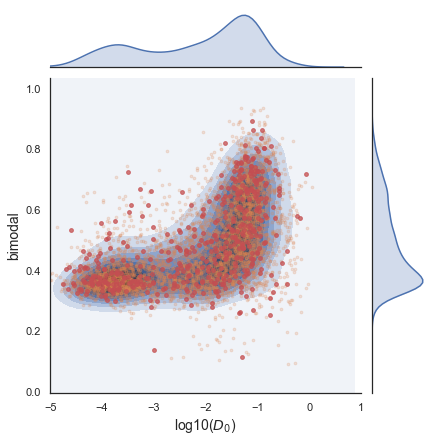

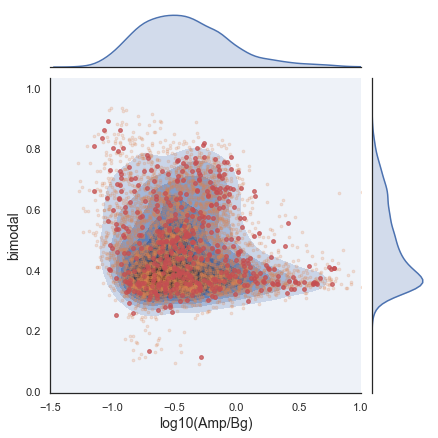

In [48]:
yt = 1.0*ampst[:,2]
xt = 1.0*Des[:,0]
sel = (xt>0)*(yt>0)
xt = log10(xt[sel])
yt = yt[sel] #log10(yt[sel])
g = sns.jointplot(x=xt, y=yt, kind='kde')

#g.ax_joint.set_ylim([-1.5,1.0])
g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("bimodal",fontsize=14)
#g.x = df2.x2
#g.y = df2.y2
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

g.x =  xt[imsk[idx0[sel]] ==1]
g.y = yt[imsk[idx0[sel]] ==1]
g.plot_joint(plt.scatter, marker='.', c='C3', s=60,alpha=0.7)

yt = ampst[:,2]
xt = ampst[:,0]/ampst[:,1]
sel = (xt>0)*(yt>0)
xt = log10(xt[sel])
yt = yt[sel] #log10(yt[sel])
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_xlim([-1.5,1.0])
#g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10(Amp/Bg)",fontsize=14)
g.ax_joint.set_ylabel("bimodal",fontsize=14)
#g.x = df2.x2
#g.y = df2.y2
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

g.x =  xt[imsk[idx0[sel]] ==1]
g.y = yt[imsk[idx0[sel]] ==1]
g.plot_joint(plt.scatter, marker='.', c='C3', s=60,alpha=0.7)


<Figure size 432x288 with 0 Axes>

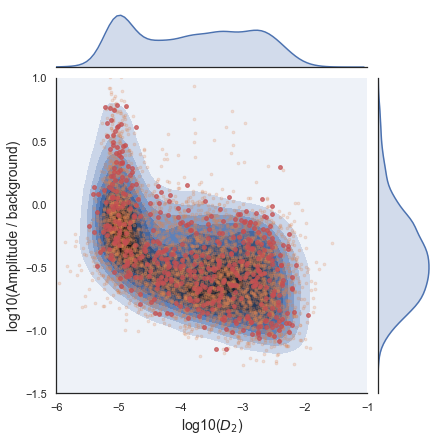

In [49]:
yt = ampst[:,0]/ampst[:,1]
xt = Dep[:,3]
sel = (xt>0)*(yt>0)
xt = log10(xt[sel])
yt = log10(yt[sel])
fig = figure()
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_ylim([-1.5,1.0])
g.ax_joint.set_xlim([-6,-1])
g.ax_joint.set_xlabel("log10($D_2$)",fontsize=14)
g.ax_joint.set_ylabel("log10(Amplitude / background)",fontsize=14)
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

g.x =  xt[imsk[idx0[sel]] ==1]
g.y = yt[imsk[idx0[sel]] ==1]
g.plot_joint(plt.scatter, marker='.', c='C3', s=60,alpha=0.7)


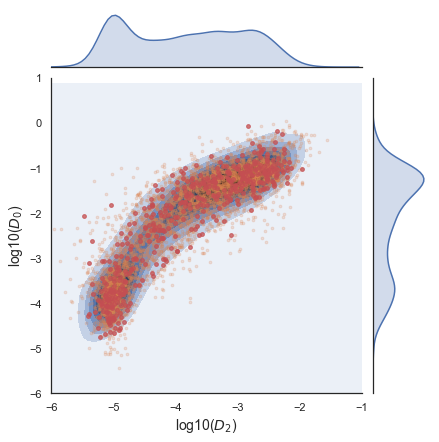

In [50]:
yt = Des[:,0]
xt = Dep[:,3]
sel = (xt>0)*(yt>0)
xt = log10(xt[sel])
yt = log10(yt[sel])
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_ylim([-6,1.0])
g.ax_joint.set_xlim([-6,-1])
g.ax_joint.set_xlabel("log10($D_2$)",fontsize=14)
g.ax_joint.set_ylabel("log10($D_0$)",fontsize=14)
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

g.x =  xt[imsk[idx0[sel]] ==1]
g.y = yt[imsk[idx0[sel]] ==1]
g.plot_joint(plt.scatter, marker='.', c='C3', s=60,alpha=0.7)


In [51]:
dfilesF = []
for i,dirt in enumerate(nwdirs):
    basedir = dirt
    files = os.listdir(basedir)
    dfiles = []
    if driftcorrected:
        for f in files:
            if f[-4:]=='.npy'and f[:4]=='posh' and f[-6:-4]=='DC': dfiles.append(basedir+f)
    else:
        for f in files:
            if f[-4:]=='.npy'and f[:4]=='posh' and f[-6:-4]!='DC': dfiles.append(basedir+f)
    dfiles.sort()
    dfilesF.extend(dfiles)
dfiles = dfilesF

In [52]:
yt = 1.0*ampst[:,0]/ampst[:,1]
xt = 1.0*Des[:,0]
sel = (xt>0)*(yt>0)
xt[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
yt[sel] = log10(yt[sel])


NRs selected:  [3794  666 4630]


Text(0.5,0,'t')

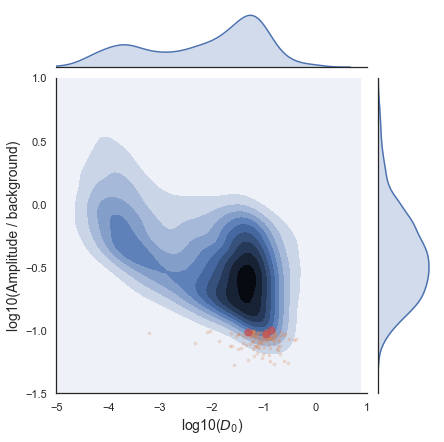

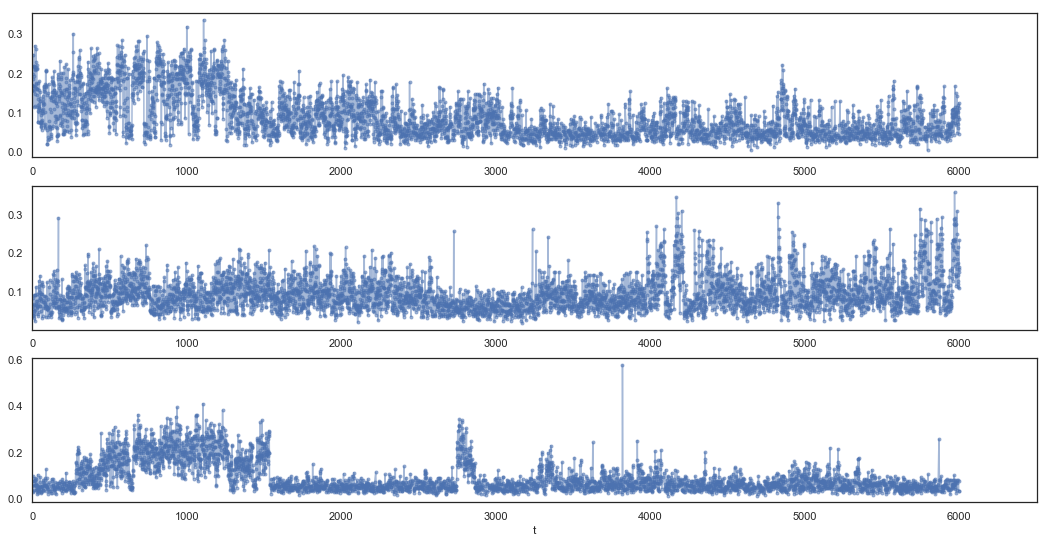

In [56]:
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_ylim([-1.5,1.0])
g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("log10(Amplitude / background)",fontsize=14)

sel = ampst[:,0]/ampst[:,1]<0.1

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)


it = permutation(arange(ampst.shape[0])[sel])[:3]
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)

print('NRs selected: ' ,it)

#fig = figure(figsize=(14,8))
fig, ax = subplots(nrows=3,figsize=(18,9))
#fig.title("Amplitude/Background < 0.1")
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

In [57]:
sel = ampst[:,0]/ampst[:,1]<0.1
it = permutation(arange(len(xt))[sel])[:3]
print(it,idx0[it])

[4627 2129 4632] [4642 2133 4647]


NRs selected:  [ 483 1126 4540]


Text(0.5,0,'t')

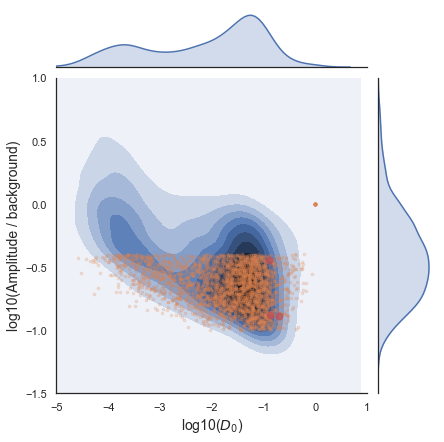

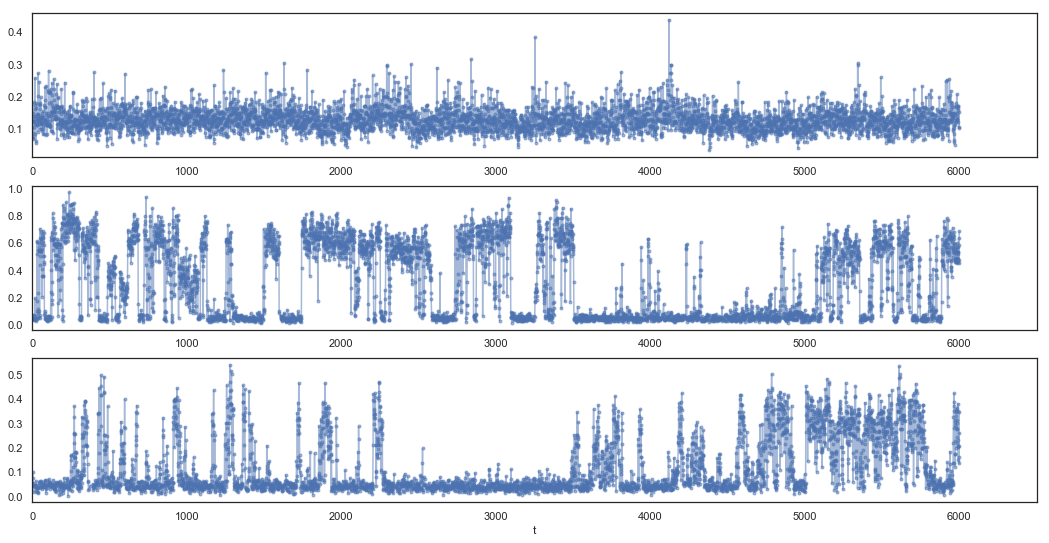

In [58]:
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_ylim([-1.5,1.0])
g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("log10(Amplitude / background)",fontsize=14)

sel = (ampst[:,0]/ampst[:,1]>0.1)*(ampst[:,0]/ampst[:,1]<0.4)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

it = permutation(arange(ampst.shape[0])[sel])[:3]
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)

print('NRs selected: ' ,it)
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

NRs selected:  [4862  127 2352]


Text(0.5,0,'t')

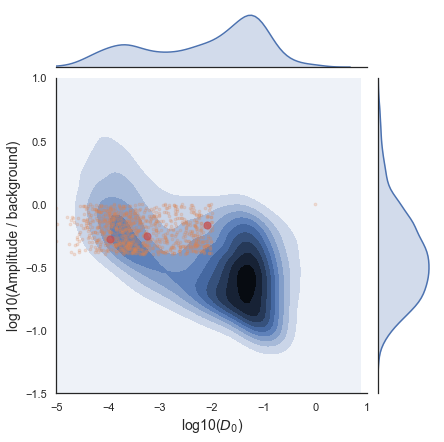

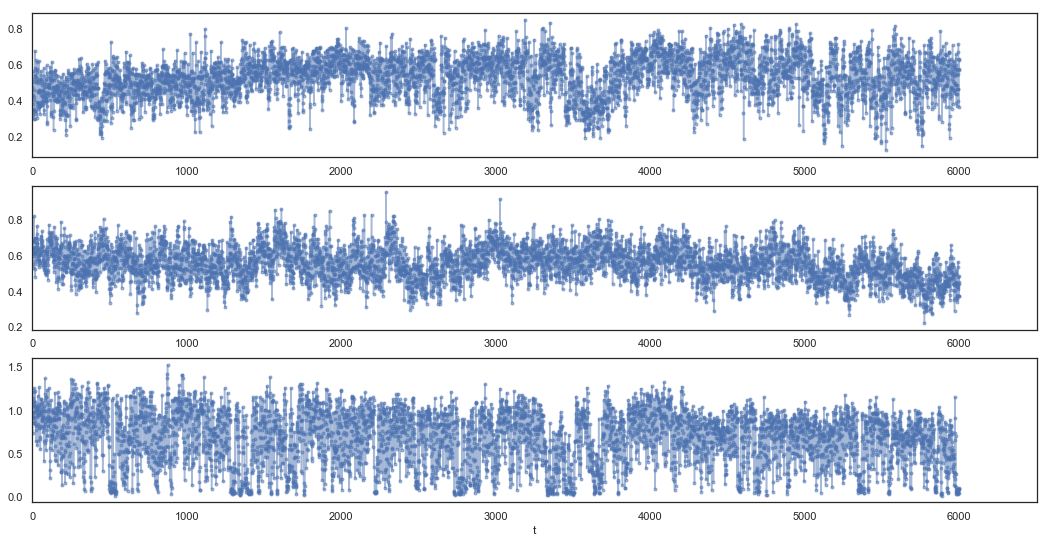

In [59]:
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_ylim([-1.5,1.0])
g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("log10(Amplitude / background)",fontsize=14)

sel = (ampst[:,0]/ampst[:,1]>0.4)*(ampst[:,0]/ampst[:,1]<1.0)*(Des[:,0]<1e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)
it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)

fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

NRs selected:  [4827 2254 2257]


Text(0.5,0,'t')

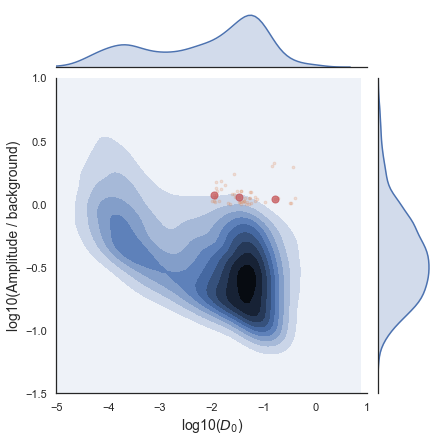

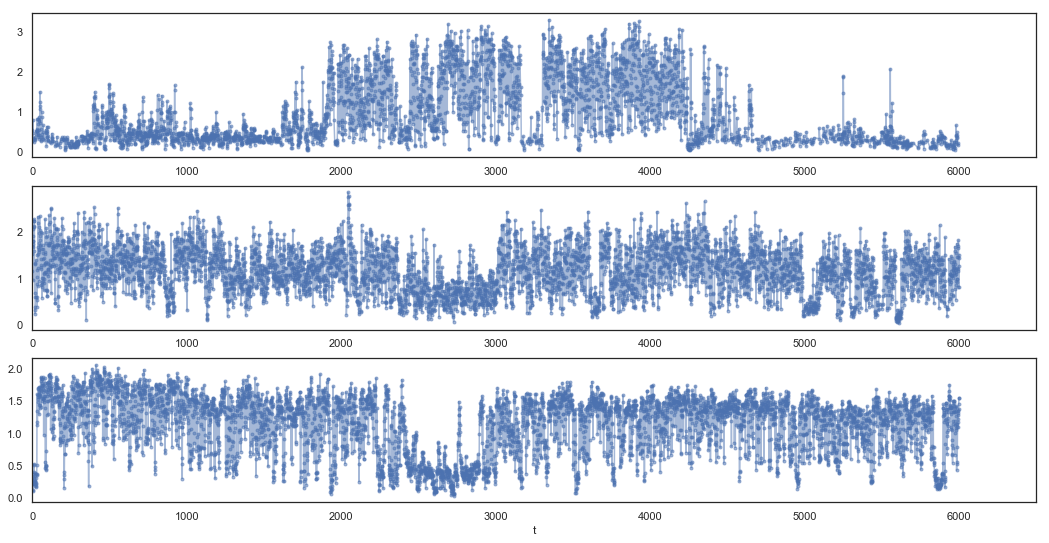

In [60]:
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_ylim([-1.5,1.0])
g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("log10(Amplitude / background)",fontsize=14)

sel = (ampst[:,0]/ampst[:,1]>1.0)*(ampst[:,0]/ampst[:,1]<3.0)*(Des[:,0]>1e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)
it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)#fig = figure(figsize=(14,8))
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

NRs selected:  [3452   48 4692]


Text(0.5,0,'t')

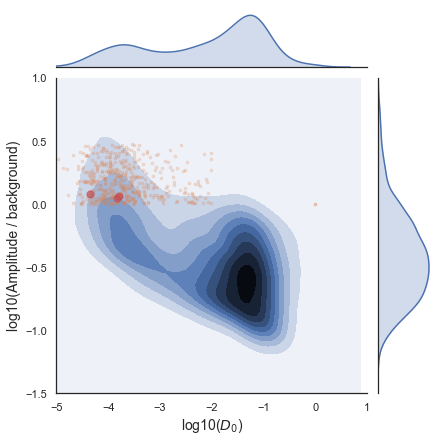

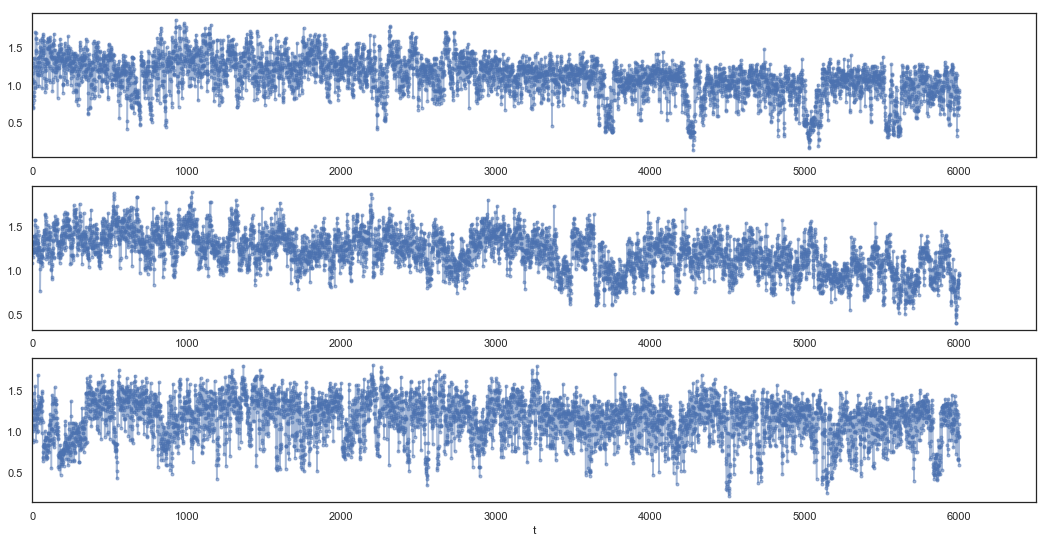

In [61]:
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_ylim([-1.5,1.0])
g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("log10(Amplitude / background)",fontsize=14)

sel = (ampst[:,0]/ampst[:,1]>1.0)*(ampst[:,0]/ampst[:,1]<3.0)*(Des[:,0]<1e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

it = permutation(arange(ampst.shape[0])[sel])[:3]
#fig = figure(figsize=(14,8))
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)#fig = figure(figsize=(14,8))
print('NRs selected: ' ,it)
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

In [62]:
print(log10(ampst[254,0]/ampst[254,1]),log10(Des[254,0]))

-0.43091703270050397 -1.2470955453912347


NRs selected:  [1336 2959 3814]


Text(0.5,0,'t')

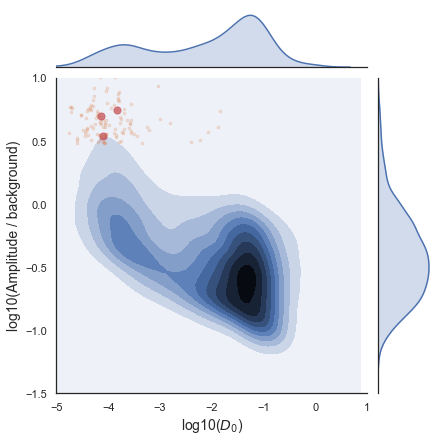

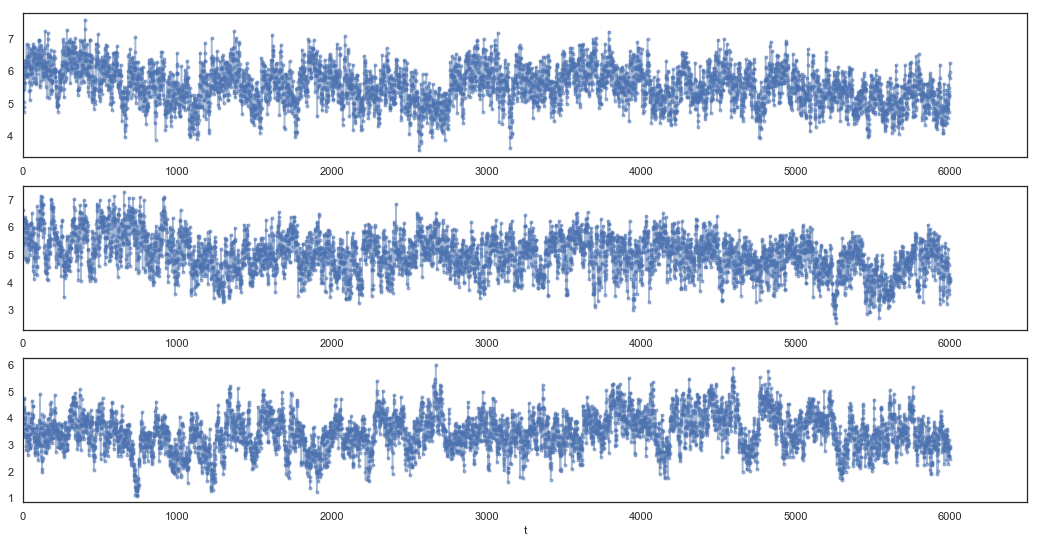

In [63]:
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_ylim([-1.5,1.0])
g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("log10(Amplitude / background)",fontsize=14)

sel = (ampst[:,0]/ampst[:,1]>3.0)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)#fig = figure(figsize=(14,8))
#fig = figure(figsize=(14,8))
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

In [64]:
yt = 1.0*ampst[:,2]
xt = ampst[:,0]/ampst[:,1]
sel = (xt>0)*(yt>0)
xt = log10(xt[sel])
yt = yt[sel] #log10(yt[sel])

NRs selected:  [5081 1125 2417]


Text(0.5,0,'t')

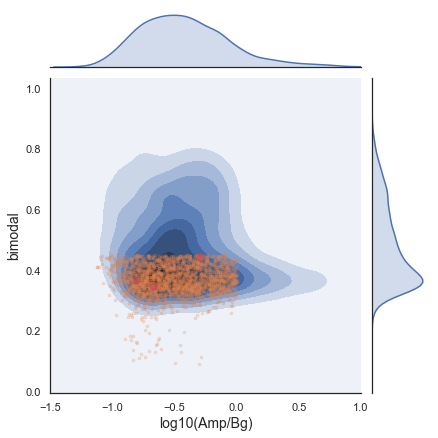

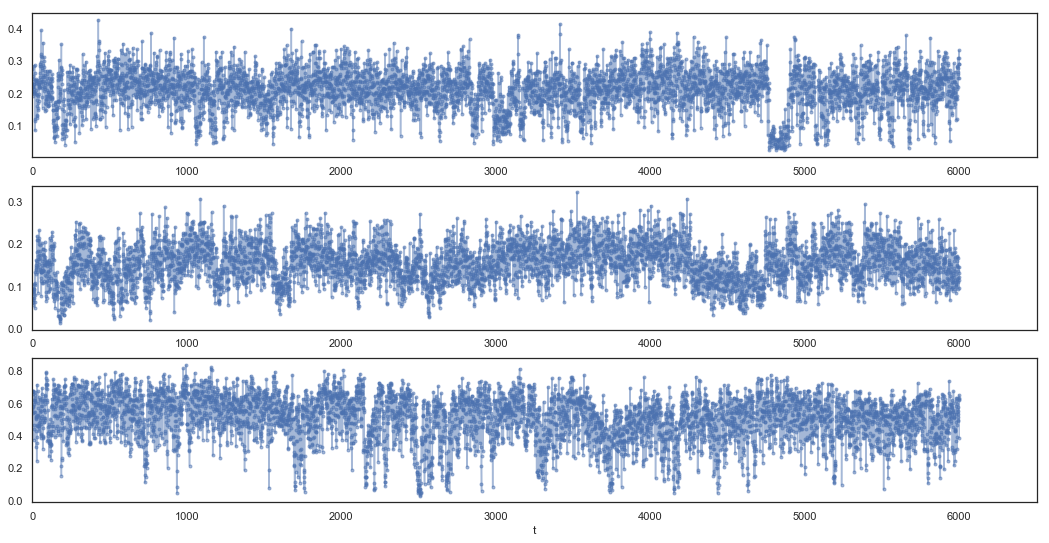

In [65]:
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_xlim([-1.5,1.0])
g.ax_joint.set_xlabel("log10(Amp/Bg)",fontsize=14)
g.ax_joint.set_ylabel("bimodal",fontsize=14)

sel = (ampst[:,2]<0.45)*(ampst[:,0]/ampst[:,1]<1.0)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)#fig = figure(figsize=(14,8))
#fig = figure(figsize=(14,8))
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

In [66]:
yt = 1.0*ampst[:,2]
xt = 1.0*Des[:,0]
sel = (xt>0)*(yt>0)
xt[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
yt[sel] = yt[sel] #log10(yt[sel])

In [67]:
%matplotlib inline

NRs selected:  [4035 3831 2506]


Text(0.5,0,'t')

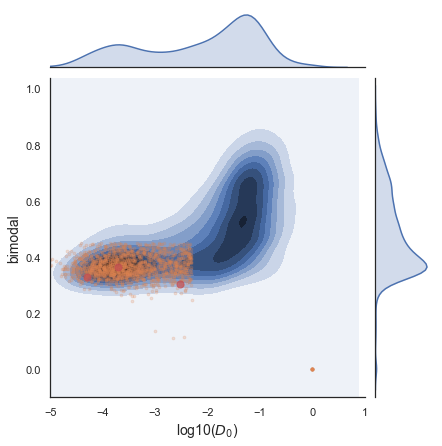

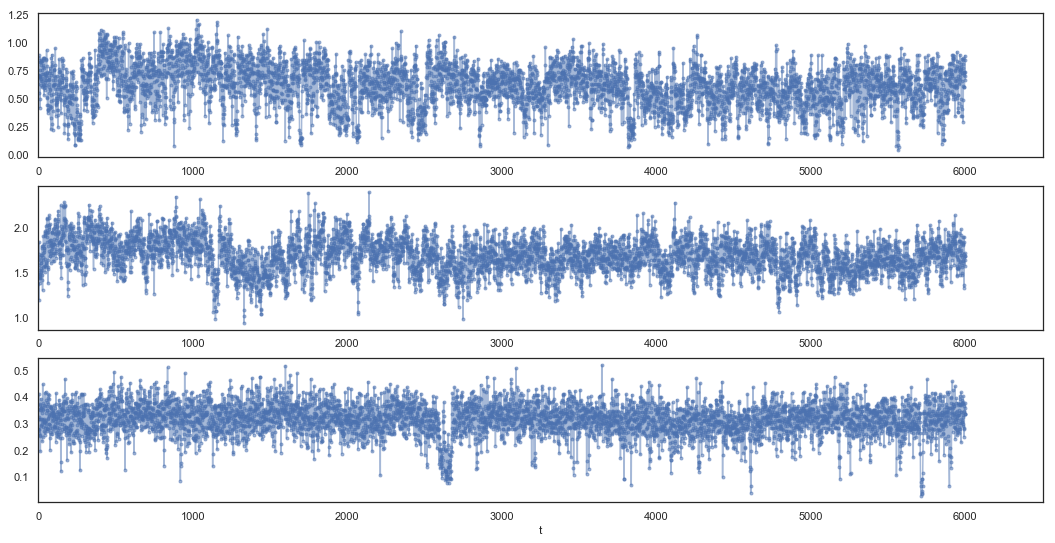

In [68]:
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("bimodal",fontsize=14)

sel = (ampst[:,2]<0.45)*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)#fig = figure(figsize=(14,8))
#fig = figure(figsize=(14,8))
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

In [69]:
yt = 1.0*ampst[:,2]
xt = 1.0*Des[:,0]
sel = (xt>0)*(yt>0)
xt[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
yt[sel] = yt[sel] #log10(yt[sel])

In [70]:
%matplotlib inline

NRs selected:  [ 276 4853 1101]


Text(0.5,0,'t')

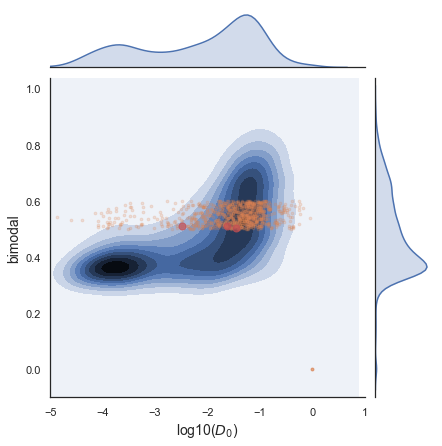

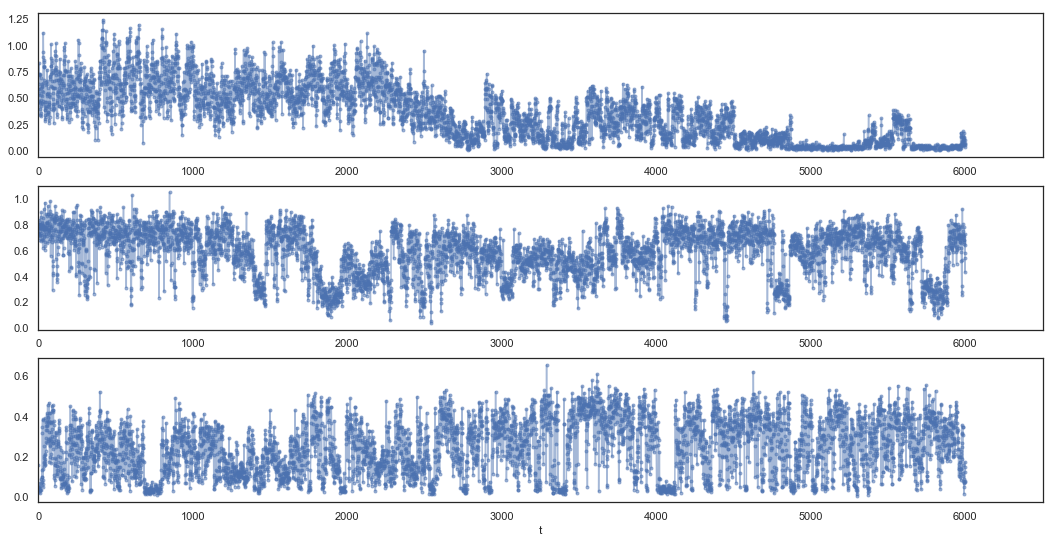

In [71]:
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("bimodal",fontsize=14)

sel = (ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)#fig = figure(figsize=(14,8))
#fig = figure(figsize=(14,8))
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

In [72]:
%matplotlib inline

NRs selected:  [1320 2731 4118]


Text(0.5,0,'t')

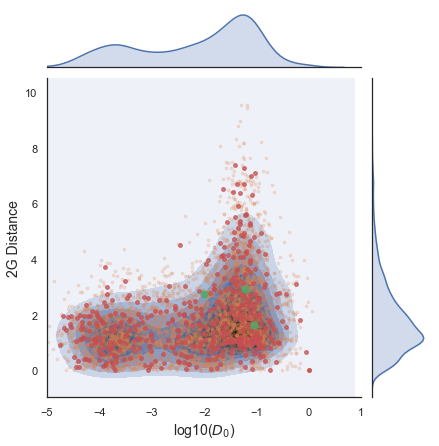

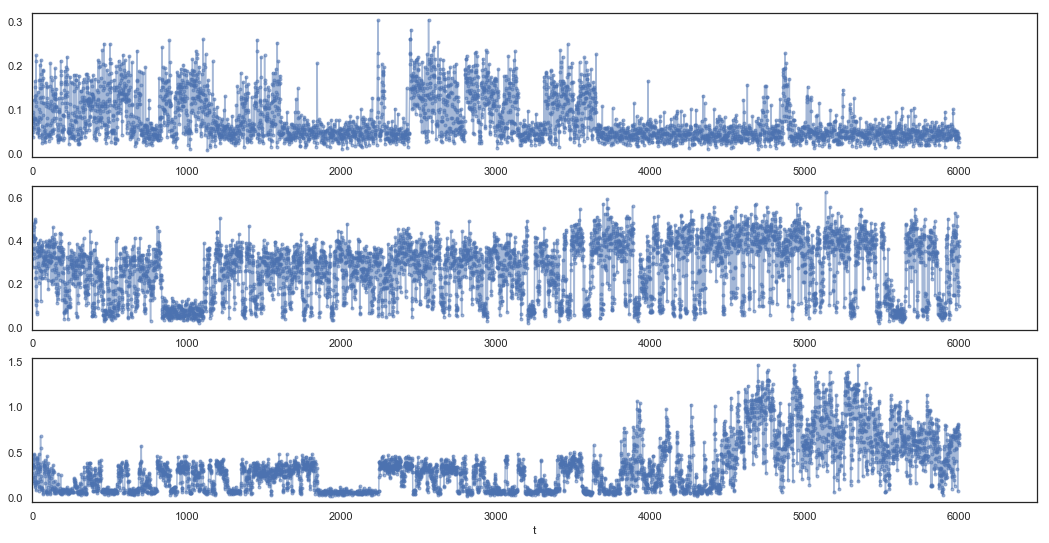

In [76]:
#sel = (abs(dgps[:,3]-dgps[:,5])<3))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
yt = abs((dgps[:,3]-dgps[:,5])/s1)
#yt = 1.0*ampst[:,2]
xt = 1.0*Des[:,0]
sel = (xt>0)*(abs(yt)<20)
xt[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
yt[sel] = yt[sel] #log10(yt[sel])


g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("2G Distance",fontsize=14)

sel = isfinite(ampst[:,2])#(ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

g.x =  xt[imsk[idx0[sel]] ==1]
g.y = yt[imsk[idx0[sel]] ==1]
g.plot_joint(plt.scatter, marker='.', c='C3', s=60,alpha=0.7)


it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C2', s=50,alpha=0.9)#fig = figure(figsize=(14,8))
#fig = figure(figsize=(14,8))
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

NRs selected:  [1143 4293 3703]


Text(0.5,0,'t')

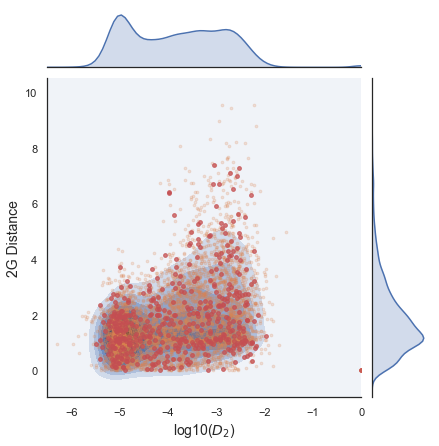

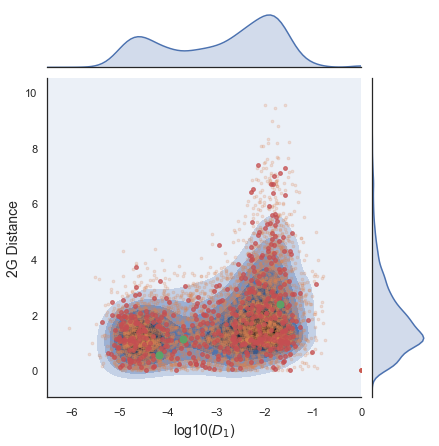

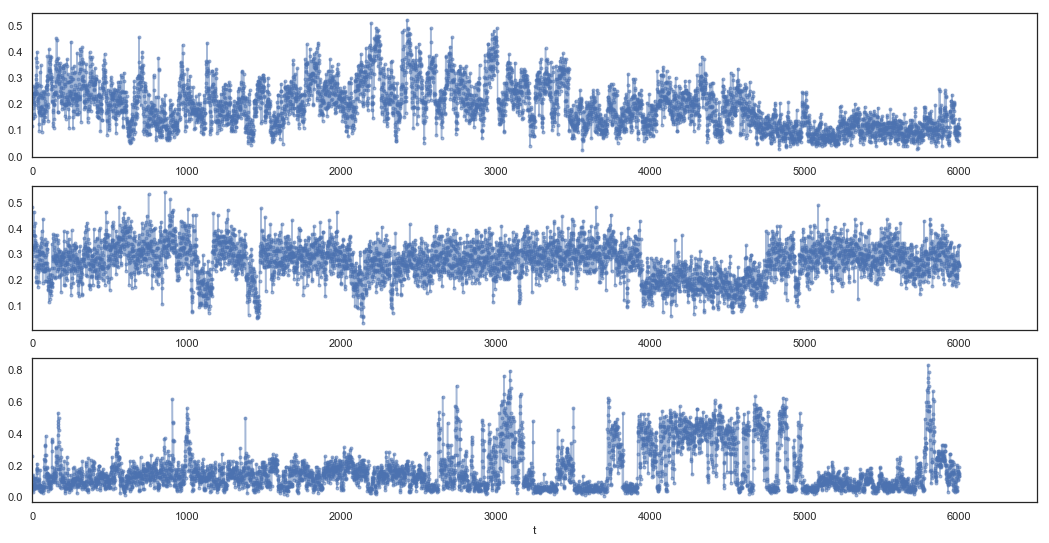

In [85]:
#sel = (abs(dgps[:,3]-dgps[:,5])<3))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
yt = abs((dgps[:,3]-dgps[:,5])/s1)
#yt = 1.0*ampst[:,2]
xt = 1.0*Dep[:,3]
sel = (xt>0)*(abs(yt)<20)
xt[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
yt[sel] = yt[sel] #log10(yt[sel])


g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_xlim([-6.5,0])
g.ax_joint.set_xlabel("log10($D_2$)",fontsize=14)
g.ax_joint.set_ylabel("2G Distance",fontsize=14)

sel = isfinite(ampst[:,2])#(ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

g.x =  xt[imsk[idx0[sel]] ==1]
g.y = yt[imsk[idx0[sel]] ==1]
g.plot_joint(plt.scatter, marker='.', c='C3', s=60,alpha=0.7)

s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
yt = abs((dgps[:,3]-dgps[:,5])/s1)
#yt = 1.0*ampst[:,2]
xt = 1.0*Dep[:,0]
sel = (xt>0)*(abs(yt)<20)
xt[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
yt[sel] = yt[sel] #log10(yt[sel])


g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_xlim([-6.5,0])
g.ax_joint.set_xlabel("log10($D_1$)",fontsize=14)
g.ax_joint.set_ylabel("2G Distance",fontsize=14)

sel = isfinite(ampst[:,2])#(ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

g.x =  xt[imsk[idx0[sel]] ==1]
g.y = yt[imsk[idx0[sel]] ==1]
g.plot_joint(plt.scatter, marker='.', c='C3', s=60,alpha=0.7)


it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C2', s=50,alpha=0.9)#fig = figure(figsize=(14,8))
#fig = figure(figsize=(14,8))
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

NRs selected:  [4016 4620 3874]


Text(0.5,0,'t')

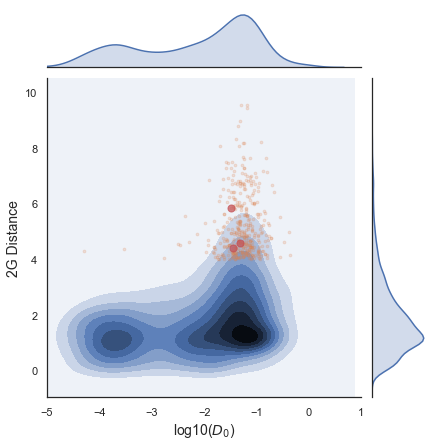

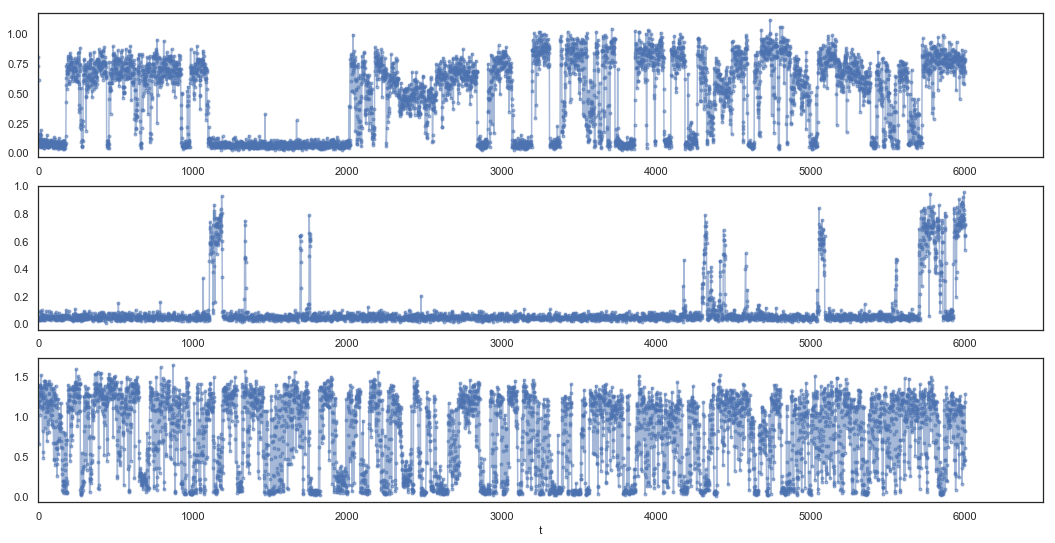

In [77]:
#sel = (abs(dgps[:,3]-dgps[:,5])<3))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
yt = abs((dgps[:,3]-dgps[:,5])/s1)
#yt = 1.0*ampst[:,2]
xt = 1.0*Des[:,0]
sel = (xt>0)*(abs(yt)<20)
xt[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
yt[sel] = yt[sel] #log10(yt[sel])


g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("2G Distance",fontsize=14)

sel = yt>4#(ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)#fig = figure(figsize=(14,8))
#fig = figure(figsize=(14,8))
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

NRs selected:  [1493 1274 3243]


Text(0.5,0,'t')

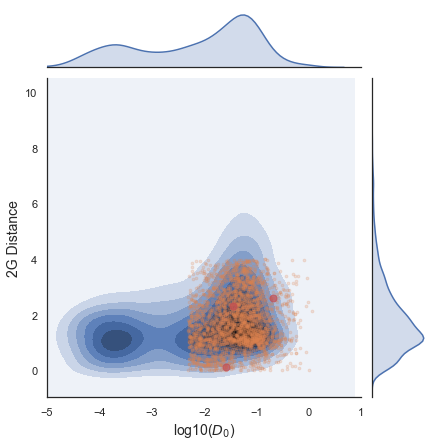

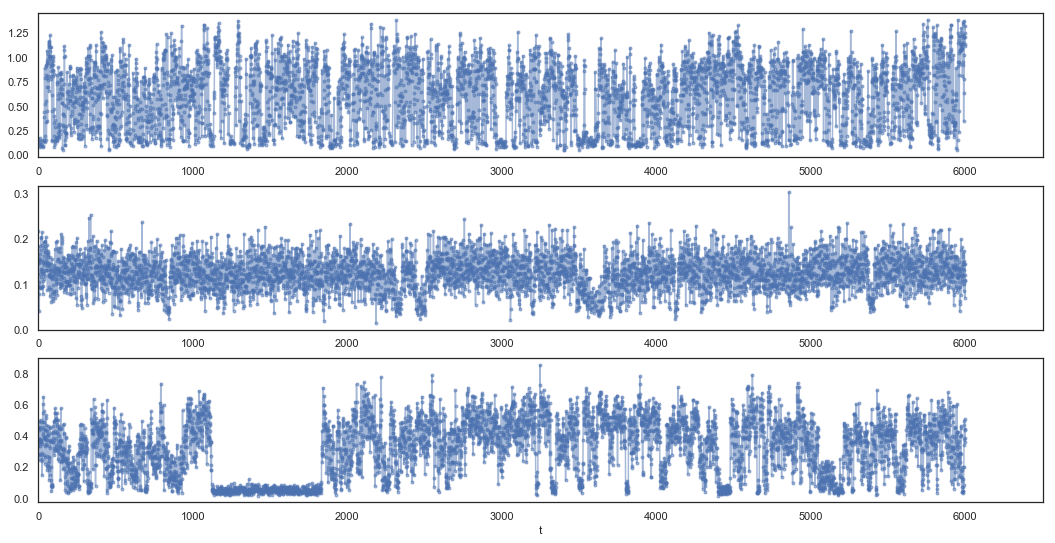

In [78]:
#sel = (abs(dgps[:,3]-dgps[:,5])<3))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
yt = abs((dgps[:,3]-dgps[:,5])/s1)
#yt = 1.0*ampst[:,2]
xt = 1.0*Des[:,0]
sel = (xt>0)*(abs(yt)<20)
xt[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
yt[sel] = yt[sel] #log10(yt[sel])


g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("2G Distance",fontsize=14)

sel = (yt<4)*(Des[:,0]>.50e-2)#(ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)#fig = figure(figsize=(14,8))
#fig = figure(figsize=(14,8))
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

NRs selected:  [  35 4684 1718]


Text(0.5,0,'t')

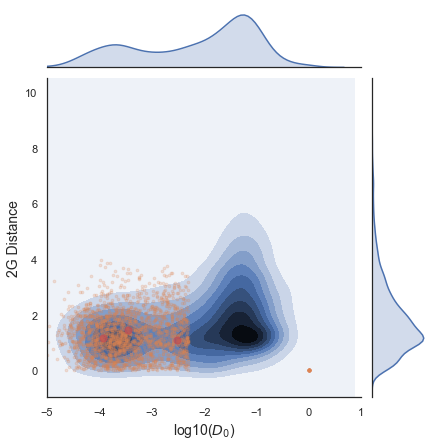

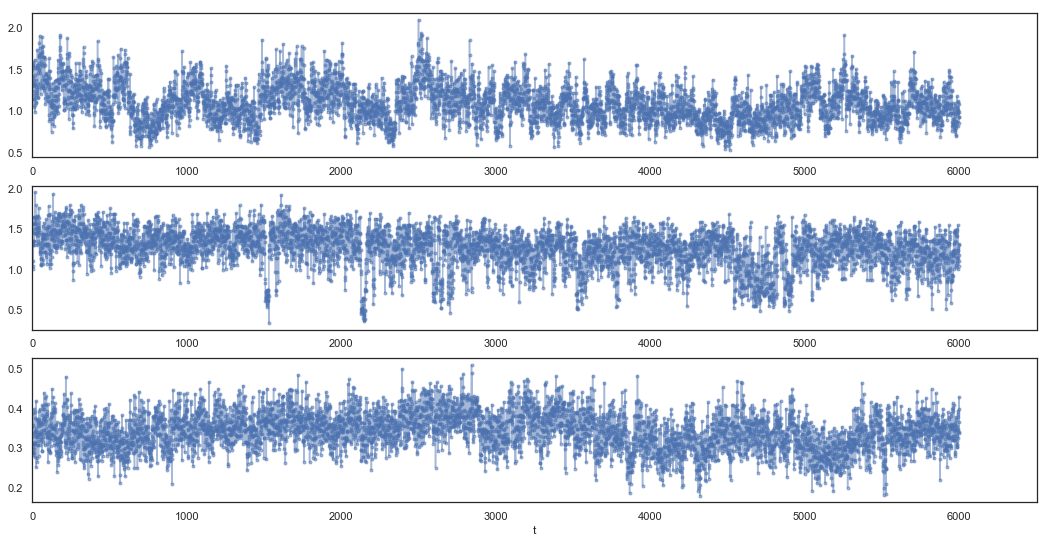

In [79]:
#sel = (abs(dgps[:,3]-dgps[:,5])<3))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
yt = abs((dgps[:,3]-dgps[:,5])/s1)
#yt = 1.0*ampst[:,2]
xt = 1.0*Des[:,0]
sel = (xt>0)*(abs(yt)<20)
xt[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
yt[sel] = yt[sel] #log10(yt[sel])


g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("2G Distance",fontsize=14)

sel = (yt<4)*(Des[:,0]<.50e-2)#(ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)#fig = figure(figsize=(14,8))
#fig = figure(figsize=(14,8))
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

NRs selected:  [2208 3951  350]


Text(0.5,0,'t')

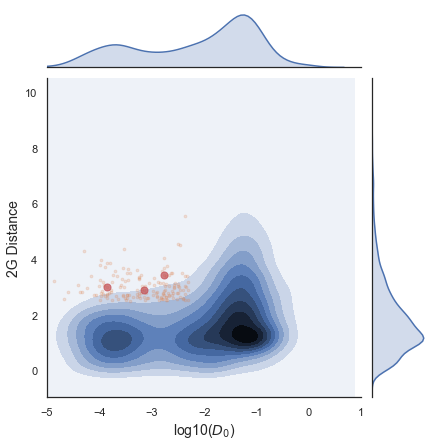

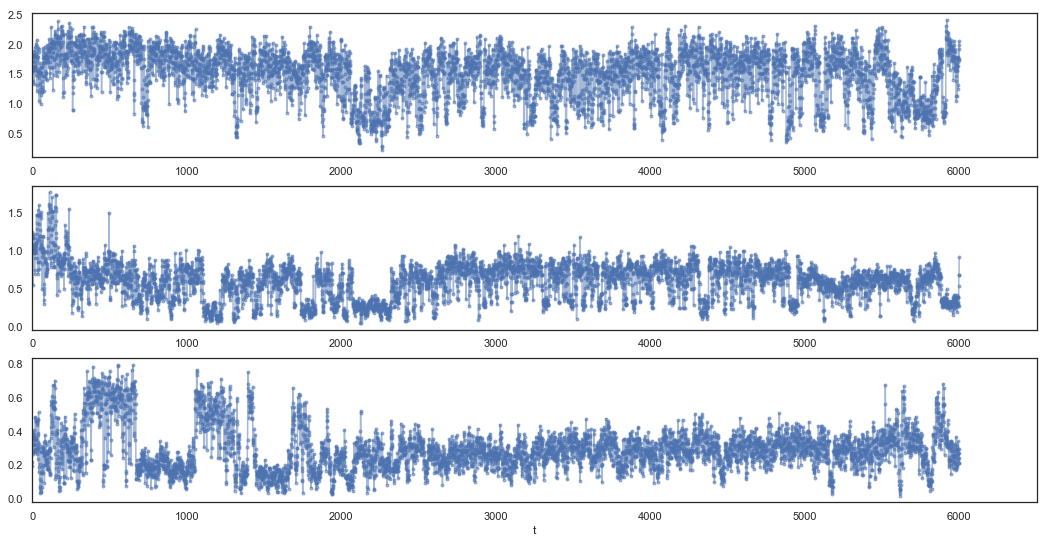

In [86]:
#sel = (abs(dgps[:,3]-dgps[:,5])<3))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
yt = abs((dgps[:,3]-dgps[:,5])/s1)
#yt = 1.0*ampst[:,2]
xt = 1.0*Des[:,0]
sel = (xt>0)*(abs(yt)<20)
xt[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
yt[sel] = yt[sel] #log10(yt[sel])


g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("2G Distance",fontsize=14)

sel = (yt>2.5)*(Des[:,0]<.50e-2)#(ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)#fig = figure(figsize=(14,8))
#fig = figure(figsize=(14,8))
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

In [81]:
#sel = (abs(dgps[:,3]-dgps[:,5])<3))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
yt = abs((dgps[:,3]-dgps[:,5])/s1)
zt = 1.0*ampst[:,2]
at = ampst[:,0]/ampst[:,1]
at2 = (dgps[:,0]+dgps[:,1]*column_stack((dgps[:,3],dgps[:,5])).max(axis=1))/ampst[:,1]
xt = 1.0*Des[:,0]
xt2 = Dep[:,0]
xt3 = Dep[:,3]
sel = (xt>0)*(xt2>0)*(xt3>0)*(zt>0)*(abs(yt)<20)
xt = log10(xt[sel])
xt2 = log10(xt2[sel])
xt3 = log10(xt3[sel])
yt = yt[sel] #log10(yt[sel])
zt = zt[sel]
at = log10(at[sel])
at2 = log10(at2[sel])
#  (m1-m2)/max(s1,s2), bimod, A/bg, A_on/bg, D0, D1, D2
data = column_stack((yt,zt,at,at2,xt,xt2,xt3))
savetxt('stats_temp.dat',data,header='#  (m1-m2)/max(s1,s2), bimod, A/bg, A_on/bg, D0, D1, D2')